In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies = pd.read_csv("C:/ss/CppPrograms/1000_Companies.csv")

In [3]:
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [4]:
x = companies.iloc[:,:-1].values
y = companies.iloc[:,4].values

In [5]:
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       ...,
       [100275.47, 241926.31, 227142.82, 'California'],
       [128456.23, 321652.14, 281692.32, 'California'],
       [161181.72, 270939.86, 295442.17, 'New York']], dtype=object)

In [6]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

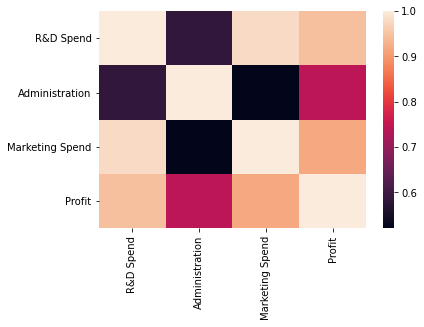

In [7]:
sns.heatmap(companies.corr())

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [9]:
labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3])

In [10]:
x

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

In [11]:
onehotencoder = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x = np.array(onehotencoder.fit_transform(x))

In [12]:
x = x[:,1:]
x

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=300)

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(x_test)

In [26]:
y_pred

array([143776.30717051, 101860.09367774,  87456.46597771, 127628.99661079,
        94007.73748162,  50683.73070645,  94400.70368374, 147054.84646576,
        52582.3630519 , 139566.91424002,  66526.67502005,  87384.76258315,
       108370.77163883,  59096.06184682,  97101.23879457,  52875.56835357,
       105395.33471611, 148874.28305165,  78209.8503206 , 117269.0648696 ,
        54599.30230994, 185076.74902187,  56910.23383914,  78064.51562011,
       154821.34919443, 171234.36024628, 183553.05363638, 146244.14781215,
       155374.658612  , 106680.56026609, 113876.55128793, 164794.49552736,
        92494.14182745,  55922.50611899, 163805.46418233, 164326.59438747,
        59359.63177209, 143000.19232359, 104474.12747186,  71913.97691803,
       182292.28032293,  53604.26121189,  68527.05960297,  74533.36456701,
        97804.08261391, 149899.17022354,  81990.17901762, 130915.02034169,
       143890.90562786, 182236.71801744,  86883.37860893, 120178.19201486,
       158213.83117438, 1

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9757397689635774

In [28]:
reg.predict([[0.0, 0.0, 162597.7, 151377.59, 443898.53]])

array([213176.59715495])